In [64]:
using Gadfly
using DataFrames
using DifferentialEquations

In [80]:
Gadfly.push_theme(:default)

In [81]:
set_default_plot_size(20cm, 7.5cm)

Zad1

In [26]:
function DEsolve(a, b, c, d, u01::Float64, u02::Float64, name, number)
    function my_f(du, u, p, t)
        du[1]= a*u[1] - b*u[1]*u[2]
        du[2]= -c*u[2] + d*u[1]*u[2]
    end 
    u0=[u01, u02]
    tspan = (0.0, 10.0)
    prob = ODEProblem(my_f,u0,tspan)
    sol = solve(prob, RK4())
    arrX = []
    arrY = []
    arrExp = []
    i=1
    while i<=length(sol.u)
        push!(arrX, sol.u[i][1])
        push!(arrY, sol.u[i][2])
        push!(arrExp, "exp$(number)")
        i+=1
    end
    writedlm(name, [["t"; sol.t] ["x"; arrX] ["y"; arrY] ["experiment"; arrExp]],',')
end

DEsolve (generic function with 2 methods)

Zad2

In [27]:
DEsolve(1, 1, 1, 1, 2.0, 7.0, "results1.csv", 1)

In [28]:
DEsolve(1, 2, 3, 4, 2.0, 7.0, "results2.csv", 2)

In [29]:
DEsolve(6, 1, 2, 3, 2.0, 7.0, "results3.csv", 3)

In [30]:
DEsolve(6, 6, 2, 2, 2.0, 7.0, "results4.csv", 4)

In [40]:
data1=readdlm("results1.csv", ',', Any, '\n', header=true)
data2=readdlm("results2.csv", ',', Any, '\n', header=true)
data3=readdlm("results3.csv", ',', Any, '\n', header=true)
data4=readdlm("results4.csv", ',', Any, '\n', header=true)

dataFull= []
dataFull = [data1[1]; data2[1]; data3[1]; data4[1]]

dataFull

557×4 Array{Any,2}:
  0          2           7         "exp1"
  0.0259673  1.7078      7.15635   "exp1"
  0.0464119  1.50438     7.24529   "exp1"
  0.0782373  1.23136     7.32962   "exp1"
  0.112375   0.991453    7.35648   "exp1"
  0.158715   0.739084    7.30853   "exp1"
  0.201525   0.565388    7.19924   "exp1"
  0.248811   0.423382    7.0279    "exp1"
  0.296269   0.319588    6.82048   "exp1"
  0.346176   0.240452    6.57904   "exp1"
  0.397356   0.181932    6.3182    "exp1"
  0.450548   0.138118    6.04173   "exp1"
  0.505564   0.105489    5.75648   "exp1"
  ⋮                                      
  9.19816    4.3509e-5   3.35907   "exp4"
  9.23053    2.80958e-5  3.14849   "exp4"
  9.26792    1.78071e-5  2.92163   "exp4"
  9.31178    1.10995e-5  2.67625   "exp4"
  9.36416    6.84141e-6  2.41011   "exp4"
  9.42799    4.21928e-6  2.12126   "exp4"
  9.50753    2.66715e-6  1.80927   "exp4"
  9.60609    1.82409e-6  1.48559   "exp4"
  9.72114    1.45499e-6  1.18024   "exp4"
  9.84611    1

In [41]:
differences=[]
tmp=size(dataFull)
tmp[1]
for i = 1:tmp[1]
    push!(differences,dataFull[i, 3]- dataFull[i, 2])
end
differences
dataWithDiff=hcat(dataFull, differences)

557×5 Array{Any,2}:
  0          2           7         "exp1"  5       
  0.0259673  1.7078      7.15635   "exp1"  5.44855 
  0.0464119  1.50438     7.24529   "exp1"  5.74091 
  0.0782373  1.23136     7.32962   "exp1"  6.09826 
  0.112375   0.991453    7.35648   "exp1"  6.36503 
  0.158715   0.739084    7.30853   "exp1"  6.56944 
  0.201525   0.565388    7.19924   "exp1"  6.63386 
  0.248811   0.423382    7.0279    "exp1"  6.60452 
  0.296269   0.319588    6.82048   "exp1"  6.50089 
  0.346176   0.240452    6.57904   "exp1"  6.33859 
  0.397356   0.181932    6.3182    "exp1"  6.13627 
  0.450548   0.138118    6.04173   "exp1"  5.90362 
  0.505564   0.105489    5.75648   "exp1"  5.65099 
  ⋮                                                
  9.19816    4.3509e-5   3.35907   "exp4"  3.35902 
  9.23053    2.80958e-5  3.14849   "exp4"  3.14846 
  9.26792    1.78071e-5  2.92163   "exp4"  2.92161 
  9.31178    1.10995e-5  2.67625   "exp4"  2.67624 
  9.36416    6.84141e-6  2.41011   "exp4"  2

In [61]:
singleData = []
tmp=size(dataWithDiff)
for exp = ["exp1", "exp2", "exp3", "exp4"]
    for i = 1:tmp[1]
        if dataWithDiff[i, 4]==exp
            push!(singleData, dataWithDiff[i, 5])
        end    
    end
    println("", exp)
    println("Mean: ", mean(singleData))
    println("Maximum: ", maximum(singleData))
    println("Minimum: ", minimum(singleData))
    println("")
end
            

exp1
Mean: 2.0045447983621796
Maximum: 6.633855597966202
Minimum: -3.774734606101634

exp2
Mean: 1.4545691215037875
Maximum: 7.478605106567348
Minimum: -5.036456702219715

exp3
Mean: 3.4715891332395388
Maximum: 11.453344464376928
Minimum: -5.036456702219715

exp4
Mean: 2.4378129376632125
Maximum: 11.453344464376928
Minimum: -15.337351707059272



Simple plotting

In [111]:
using CSV
function myDraw(input)
    myData=CSV.read(input, delim=",")
    df1=DataFrame(t=myData[:t], u=myData[:x])
    df2=DataFrame(t=myData[:t], u=myData[:y])
    plot(layer(df1, x="t", y="u", Geom.line, Theme(default_color="red")), layer(df2, Geom.line, x="t", y="u"))
end

myDraw (generic function with 1 method)

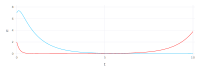

In [112]:
myDraw("results1.csv")

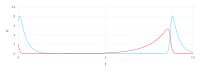

In [113]:
myDraw("results2.csv")

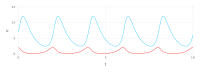

In [114]:
myDraw("results3.csv")

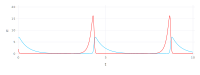

In [115]:
myDraw("results4.csv")

Zad3

In [140]:
set_default_plot_size(20cm, 15cm)

In [141]:
using CSV
function GroupDraw(input)
    myData=CSV.read(input, delim=",")
    widedf=DataFrame(dt=myData[:t], dx=myData[:x], dy=myData[:y])
    longdf=stack(widedf, [:dx, :dy])
    plot(longdf, ygroup="variable", x="dt", y="value", Geom.subplot_grid(Geom.point))
end    

GroupDraw (generic function with 1 method)

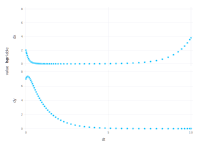

In [142]:
GroupDraw("results1.csv")

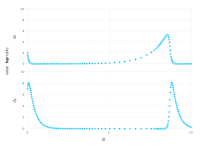

In [143]:
GroupDraw("results2.csv")

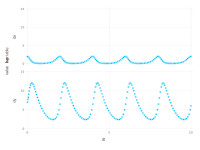

In [144]:
GroupDraw("results3.csv")

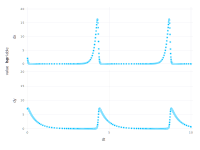

In [145]:
GroupDraw("results4.csv")